### Importing libraries:

In [19]:
import tensorflow as tf
from keras.layers import Input, Lambda, Flatten, Dense
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.models import load_model
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

### Re-size all images to (224,224)

In [2]:
IMAGE_SIZE = [224,224]

In [3]:
train_path = 'Images/Train'
valid_path = 'Images/Test'

### Add preprocessing layer to the front of VGG

In [4]:
vgg = VGG16(input_shape=IMAGE_SIZE+[3],weights='imagenet',include_top=False)

### Dont train existing weights:

In [5]:
for layer in vgg.layers:
    layer.trainable = False

### Useful for getting number of classes:

In [6]:
folders = glob('Images/Train/*')

### Layers:

In [7]:
x = Flatten()(vgg.output)
prediction = Dense(len(folders),activation='softmax')(x)

### Creating model:

In [8]:
model = Model(inputs=vgg.input,outputs=prediction)

In [9]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [10]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [11]:
from keras.preprocessing.image import ImageDataGenerator

In [12]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [13]:
training_set = train_datagen.flow_from_directory('Images/Train',
                                                target_size=(224,224),
                                                batch_size=32,
                                                class_mode='categorical')
test_set = test_datagen.flow_from_directory('Images/Test',
                                                target_size=(224,224),
                                                batch_size=32,
                                                class_mode='categorical')

Found 360 images belonging to 4 classes.
Found 40 images belonging to 4 classes.


### Fit the model:

In [14]:
r = model.fit_generator(training_set,
                        validation_data=test_set,
                       epochs=5,
                        steps_per_epoch=len(training_set),
                       validation_steps=len(test_set))

Epoch 1/5
12/12 [==============================] - 100s 8s/step - loss: 0.8245 - accuracy: 0.6333 - val_loss: 0.0168 - val_accuracy: 1.0000
Epoch 2/5
12/12 [==============================] - 92s 8s/step - loss: 0.0703 - accuracy: 0.9889 - val_loss: 0.0226 - val_accuracy: 1.0000
Epoch 3/5
12/12 [==============================] - 98s 8s/step - loss: 0.0175 - accuracy: 1.0000 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 4/5
12/12 [==============================] - 94s 8s/step - loss: 0.0076 - accuracy: 1.0000 - val_loss: 8.1329e-04 - val_accuracy: 1.0000
Epoch 5/5
12/12 [==============================] - 97s 8s/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 0.0015 - val_accuracy: 1.0000


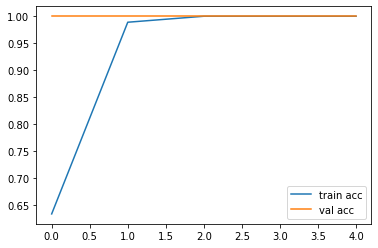

In [17]:
plt.plot(r.history['accuracy'],label='train acc')
plt.plot(r.history['val_accuracy'],label='val acc')
plt.legend()
plt.show()

In [20]:
model.save('trained_model.h5')